In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('course_labeled.csv')
df["pos_ratio"] = np.nan_to_num(df["positive"] / df[["negative", "neutral", "positive"]].sum(axis=1))
df["neg_ratio"] = np.nan_to_num(df["negative"] / df[["negative", "neutral", "positive"]].sum(axis=1))

FileNotFoundError: [Errno 2] No such file or directory: 'course_labeled_1.csv'

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,id,name,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users,course_classification
0,C_655852,系列课-已结课无回顾时长,162,1.0,0.666667,0.0,0.0,0.0,48,normal
1,C_655850,系列课-开课未开始,91,1.0,0.000000,0.0,0.0,0.0,47,bad
2,C_654554,系列课-开课中,99,1.0,0.655651,0.0,0.0,0.0,47,normal
3,C_654506,系列课-开课已结束有回顾时长,3,1.0,0.655651,0.0,0.0,0.0,47,bad
4,C_629558,医学免疫学与病原生物学,91,1.0,0.655651,0.0,0.0,0.0,48,normal
...,...,...,...,...,...,...,...,...,...,...
2817,C_2342518,客户关系管理,78,1.0,0.835524,0.0,0.0,0.0,355,good
2818,C_2342532,Fundamentals of Circuit Analysis,204,1.0,0.736111,0.0,0.0,0.0,103,good
2819,C_2343056,运动训练基本原理与方法,26,1.0,0.635000,0.0,0.0,0.0,90,bad
2820,C_2343522,高等飞行动力学,42,1.0,0.655651,0.0,0.0,0.0,75,bad


# Distribution

In [ ]:
df['num_users'].max()

231674

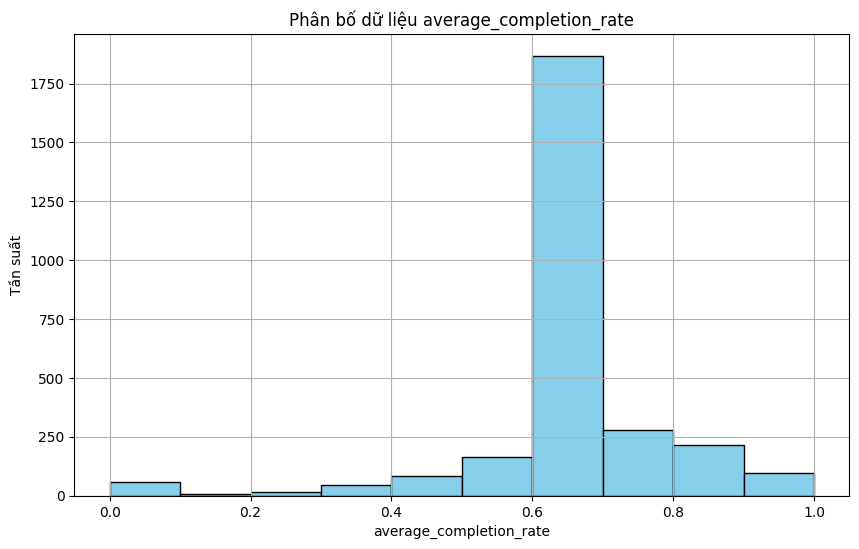

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['average_completion_rate'], bins=10, color='skyblue', edgecolor='black')
plt.title('Phân bố dữ liệu average_completion_rate')
plt.xlabel('average_completion_rate')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Course Classification Distribution')

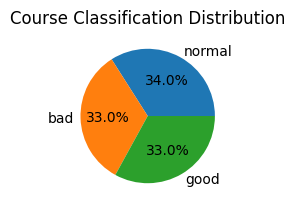

In [ ]:
plt.subplot(2, 2, 3)
plt.pie(df["course_classification"].value_counts(), labels=df["course_classification"].value_counts().index, autopct='%1.1f%%')
plt.title('Course Classification Distribution')

Text(0.5, 1.0, 'Number of Users Distribution')

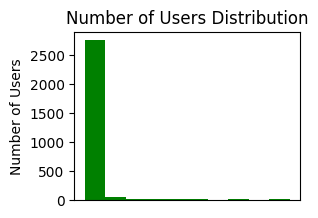

In [ ]:
plt.subplot(2, 2, 2)
plt.hist(df["num_users"], color='green')
plt.xticks([])
plt.ylabel('Number of Users')
plt.title('Number of Users Distribution')

# Features importance using MDI

In [ ]:
X = df.drop(columns=['id',
                     'name',
                     'course_classification',])
y = df['course_classification']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [ ]:
X_train.shape

(2116, 7)

In [ ]:
X_test.shape

(706, 7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.008 seconds


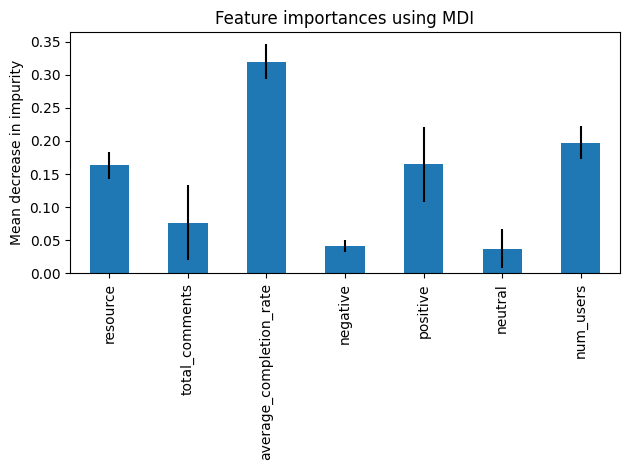

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()